In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import pandas as pd

sns.set(font_scale=1.7)
root = '/Users/bolin/Library/CloudStorage/OneDrive-UniversityofToronto/AutoLTS/res/'

# Res50-FC Loss Visualization

In [6]:
def check_loss(file_name):
    # load loss records
    path = root + f'{file_name}_loss.txt'
    loss = np.loadtxt(path, delimiter=',')
    train_loss = loss[:, 0] / 27407
    vali_loss = loss[:, 1] / 5873
    # serch for the lowest validation point
    idx = np.argmin(vali_loss)
    # visualize
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(train_loss, label='Training', color='blue')
    ax.plot(vali_loss, label='Validation', color='red')
    print(idx)
    ax.hlines(vali_loss[idx], 0, len(train_loss), color='black', linestyle='dashed')
    ax.set_title(f'Experiment ID {file_name}', size=15)
    ax.set_xlabel('Epoch', size=20)
    ax.set_ylabel('Mean Cross Entropy Loss', size=20)
    plt.legend(fontsize=18)
    
    
    plt.show()

8


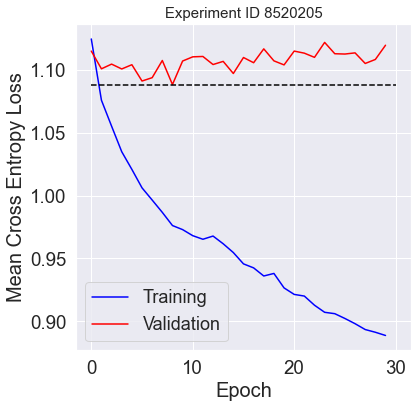

In [5]:
check_loss('8520205')

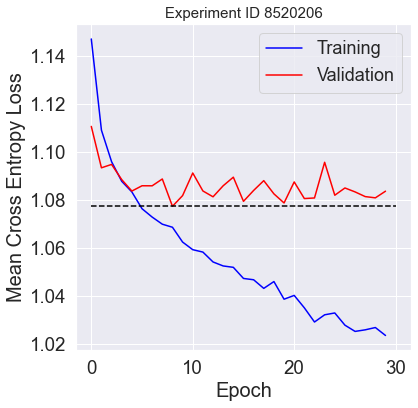

In [98]:
check_loss('8520206')

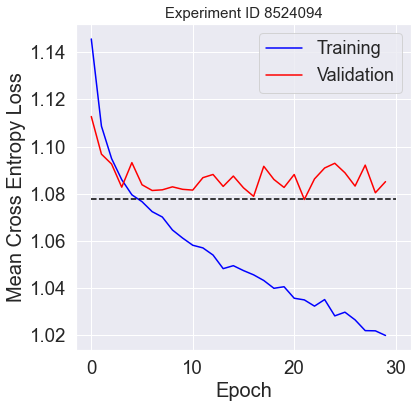

In [101]:
check_loss('8524094')

16


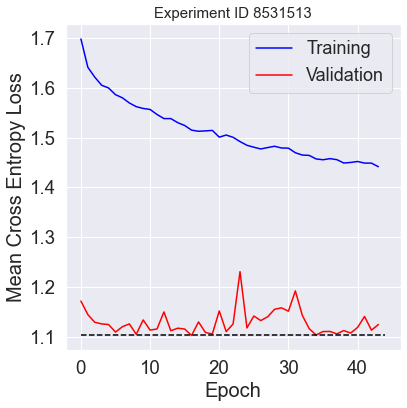

In [8]:
check_loss('8531513')

38


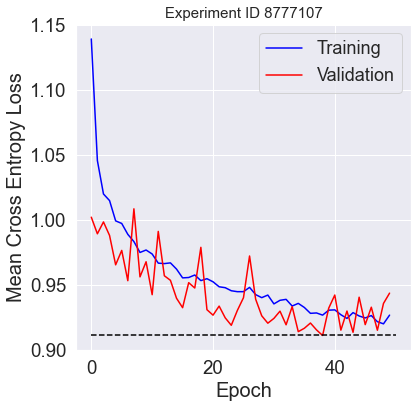

In [10]:
# res50 forzen
check_loss('8777107')

5


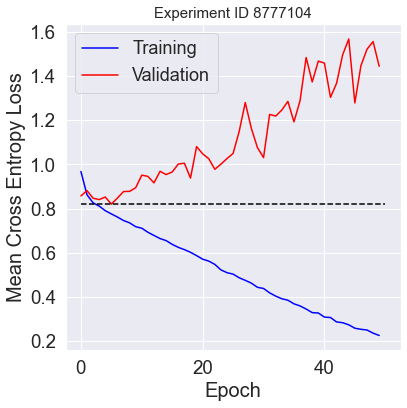

In [11]:
# res 50 unfrozen
check_loss('8777104')

22


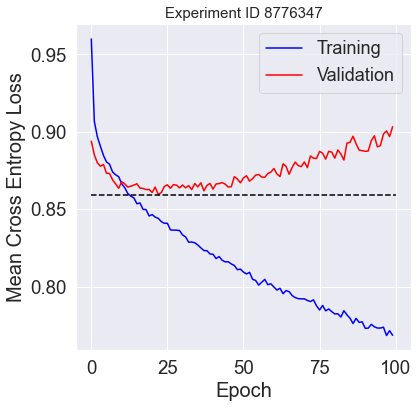

In [41]:
check_loss('8776347')

3


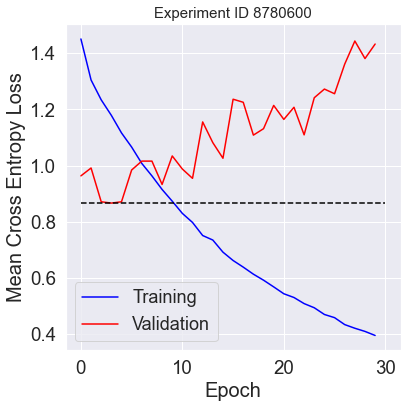

In [7]:
check_loss('8780600')

29


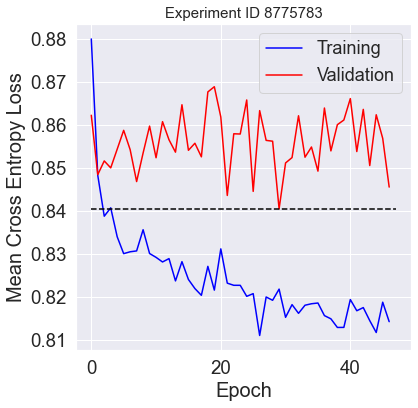

In [14]:
check_loss('8775783')

# Res50-FC Confusion Matrix Visualization

In [10]:
def check_conf_mat(file_name):
    # load data
    res = torch.load(root + f'{file_name}_res.pt')
    # visualization
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax_cbar = fig.add_axes([0.93, 0.13, 0.02, 0.75])
    for idx, dataset in enumerate(['training', 'validation', 'test']):
        data = res[dataset]['conf_mat'] * 100
        acc = res[dataset]['accuracy']
        sns.heatmap(data, ax=ax[idx], annot=True, cmap=sns.light_palette("seagreen", reverse=False), 
                    vmin=0, vmax=100, annot_kws={'fontsize':22}, cbar_ax=ax_cbar)
        ax[idx].set_title(f'{dataset} (accuracy {acc:.2f}%)', size=20)
        ax[idx].set_xticks([0.5, 1.5, 2.5, 3.5], ['LTS1', 'LTS2', 'LTS3', 'LTS4'], size=20)
        ax[idx].set_yticks([0.5, 1.5, 2.5, 3.5], ['LTS1', 'LTS2', 'LTS3', 'LTS4'], size=20)
        ax[idx].set_xlabel('Predicted Label', size=20)
        if idx == 0:
            ax[idx].set_ylabel('True Label', size=25)
    plt.show()

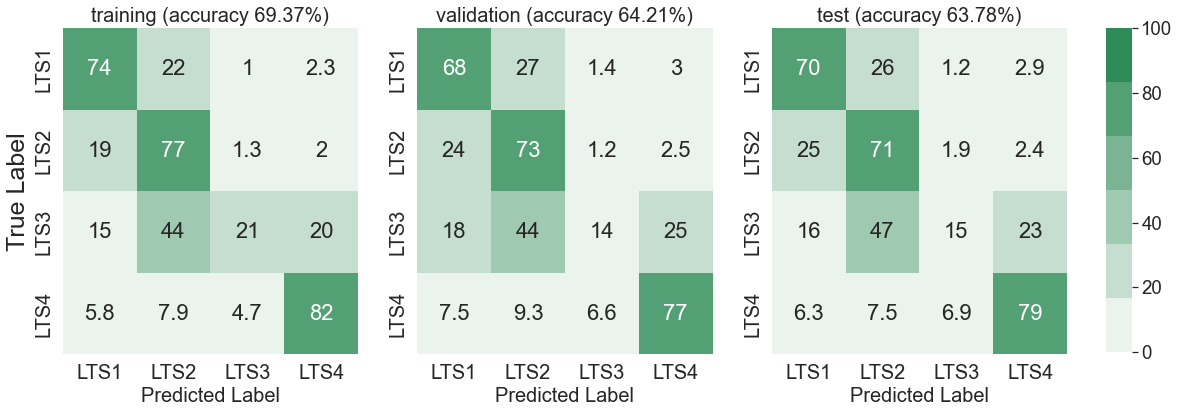

In [11]:
check_conf_mat('8504035_4')

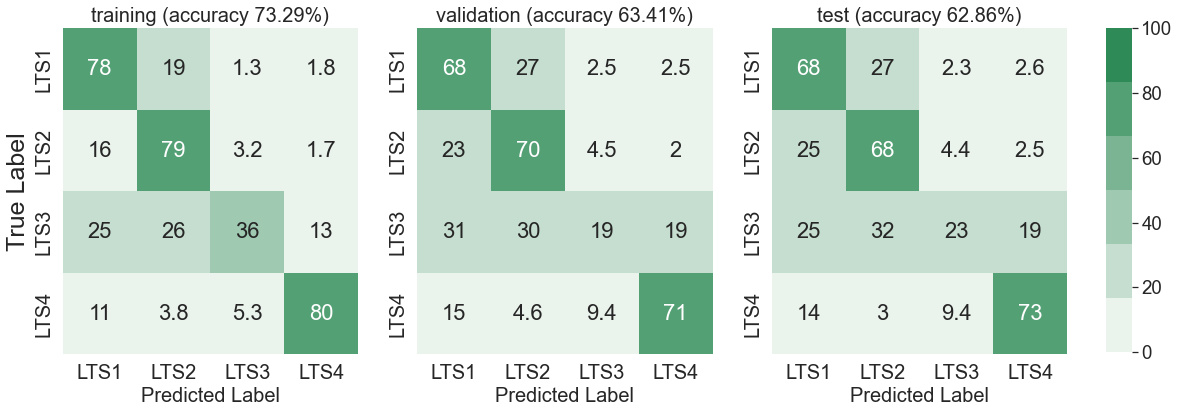

In [113]:
check_conf_mat('8520205_4')

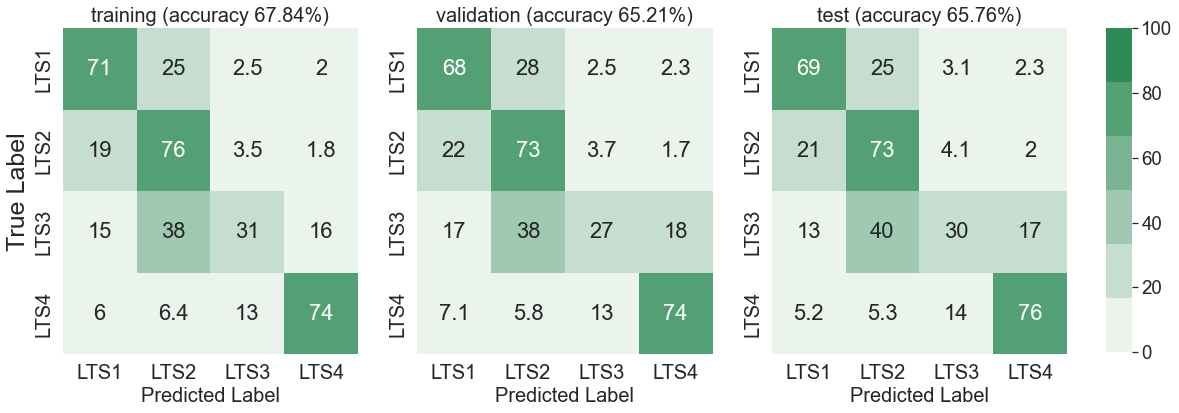

In [114]:
check_conf_mat('8520206_4')

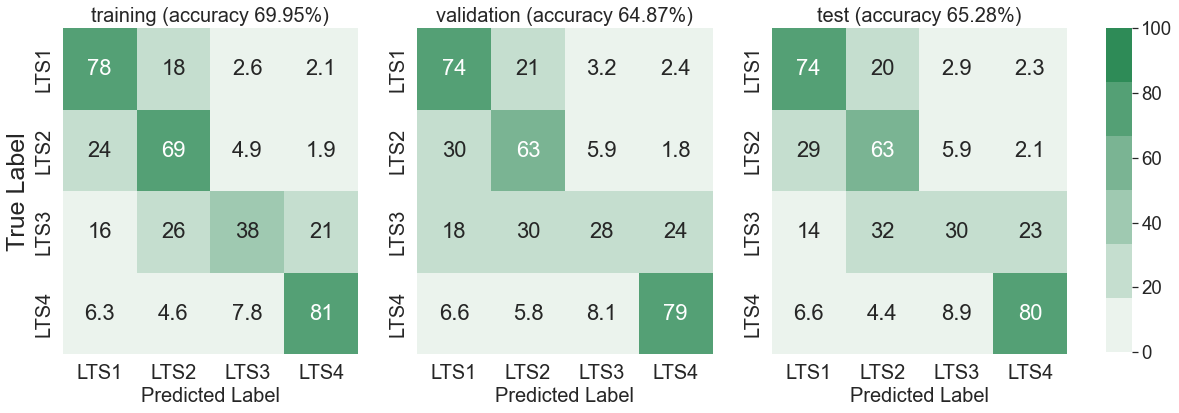

In [115]:
check_conf_mat('8524094_14')

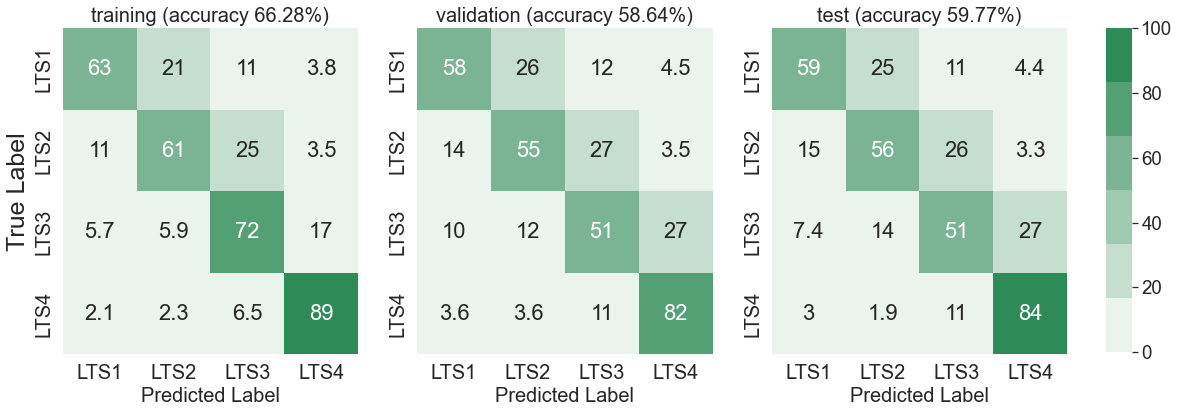

In [12]:
check_conf_mat('8531513_16')

# Res50-FC - evaluation metrics

In [9]:
def check_comp_res(file_name):
    # load data
    res = torch.load(root + f'{file_name}_res.pt')
    # visualization
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    ax_cbar = fig.add_axes([0.93, 0.13, 0.02, 0.75])
    records = []
    for idx, dataset in enumerate(['training', 'validation', 'test']):
        # extract
        data = res[dataset]['conf_mat'] * 100
        acc = res[dataset]['accuracy']
        aggacc = res[dataset]['aggregated_accuracy']
        mae = res[dataset]['mae']
        mse = res[dataset]['mse']
        ob = res[dataset]['ob']
        kt = res[dataset]['kt'] if dataset == 'training' else res[dataset]['kt']
        if kt > 1:
            kt = kt / (5872 ** 2)
        sns.heatmap(data, ax=ax[idx], annot=True, cmap=sns.light_palette("seagreen", reverse=False), 
                    vmin=0, vmax=100, annot_kws={'fontsize':22}, cbar_ax=ax_cbar)
        ax[idx].set_title(f'{dataset} (accuracy {acc:.2f}%)', size=20)
        ax[idx].set_xticks([0.5, 1.5, 2.5, 3.5], ['LTS1', 'LTS2', 'LTS3', 'LTS4'], size=20)
        ax[idx].set_yticks([0.5, 1.5, 2.5, 3.5], ['LTS1', 'LTS2', 'LTS3', 'LTS4'], size=20)
        ax[idx].set_xlabel('Predicted Label', size=20)
        if idx == 0:
            ax[idx].set_ylabel('True Label', size=25)
        records.append([acc, aggacc, ob, mae, mse, kt])
    records = pd.DataFrame(records, columns = ['acc', 'aggacc', 'ob', 'mae', 'mse', 'kt'], index=['training', 'validation', 'test'])
    plt.show()
    return records.round(2)

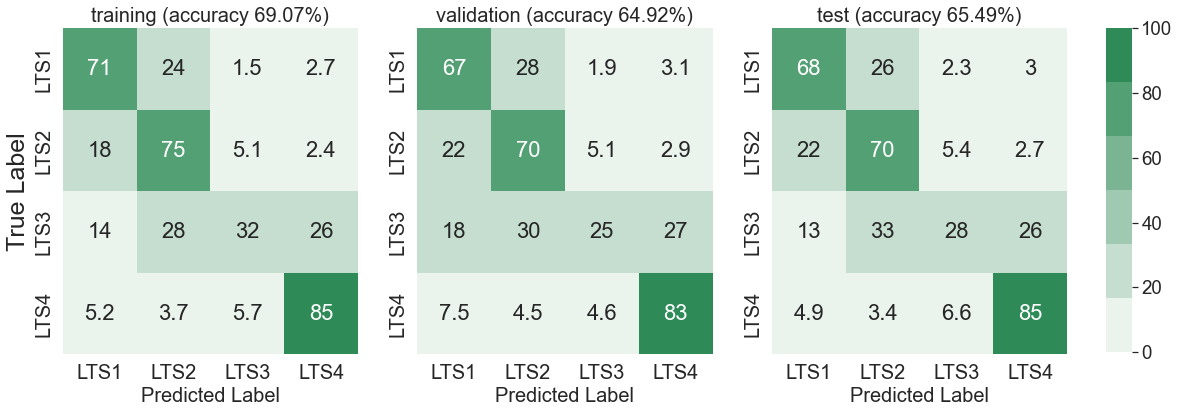

,acc,aggacc,ob,mae,mse,kt
training,69.07,89.36,tensor(94.7313),tensor(0.3788),tensor(0.5514),0
validation,64.92,88.06,tensor(93.5297),tensor(0.4361),tensor(0.6479),tensor(0.3066)
test,65.49,88.01,tensor(94.2278),tensor(0.4204),tensor(0.6060),tensor(0.3162)


In [10]:
# res50 unfrozen1
check_comp_res('8777104_5')

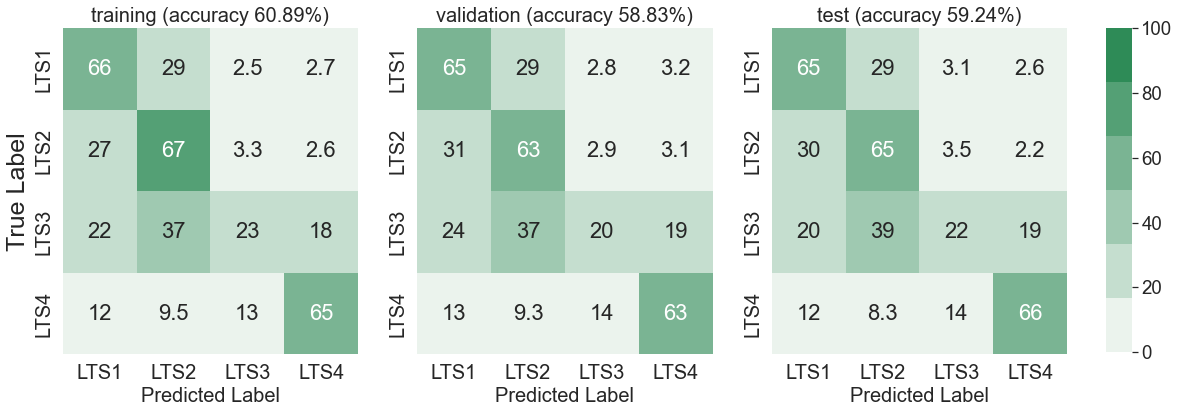

,acc,aggacc,ob,mae,mse,kt
training,60.89,86.10,tensor(91.8926),tensor(0.4960),tensor(0.7538),0
validation,58.83,85.78,tensor(91.2140),tensor(0.5266),tensor(0.8107),tensor(0.2740)
test,59.24,85.63,tensor(91.9973),tensor(0.5118),tensor(0.7686),tensor(0.2814)


In [11]:
# res50 frozen
check_comp_res('8777107_38')

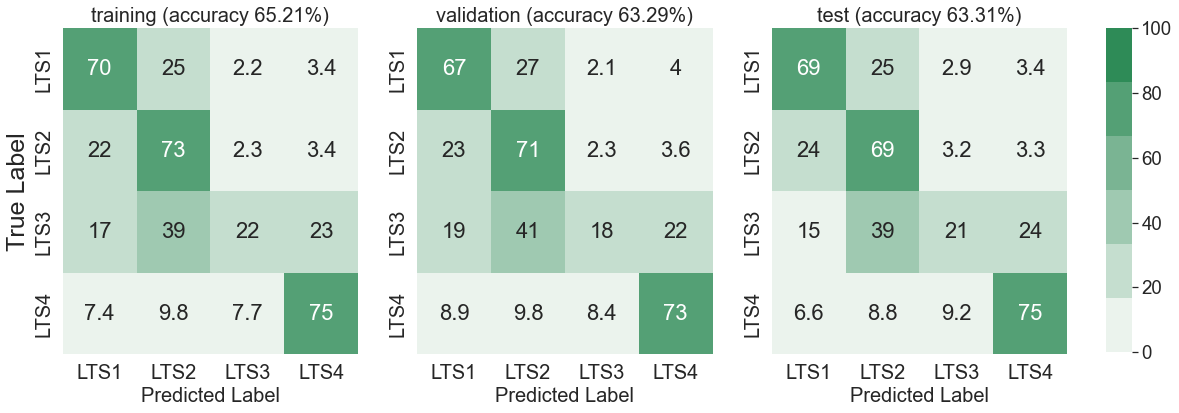

,acc,aggacc,ob,mae,mse,kt
training,65.21,86.80,92.49,0.44,0.68,0.00
validation,63.29,86.23,91.96,0.47,0.74,0.29
test,63.31,86.24,92.58,0.46,0.70,0.30


In [12]:
# MoCo - FC
check_comp_res('8776347_24')

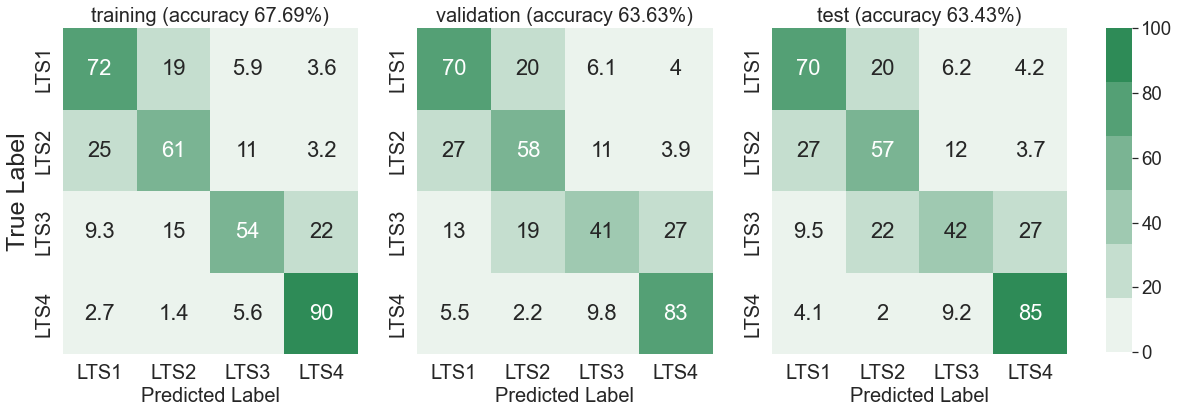

,acc,aggacc,ob,mae,mse,kt
training,67.69,87.49,93.32,0.41,0.61,0.00
validation,63.63,85.70,92.01,0.47,0.71,0.31
test,63.43,85.36,92.49,0.46,0.70,0.31


In [13]:
# res50 biased, unfrozen
check_comp_res('8780600_3')

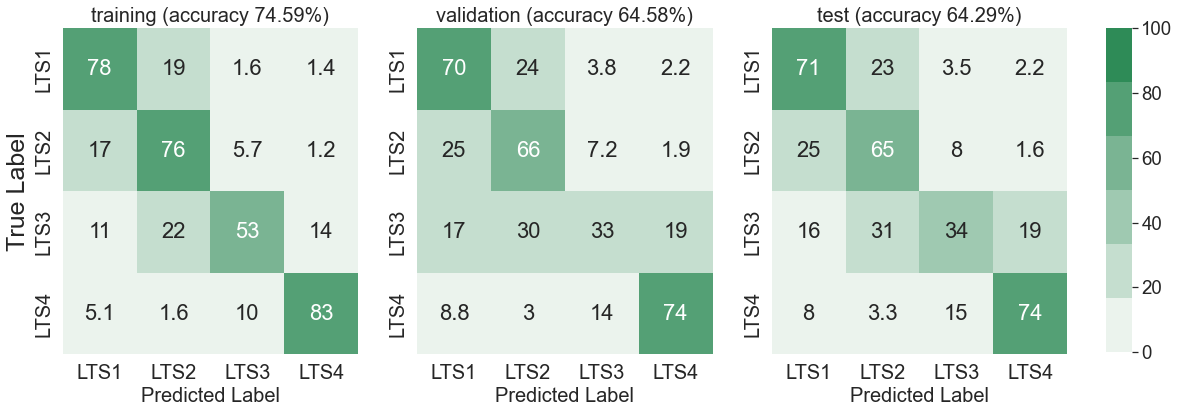

,acc,aggacc,ob,mae,mse,kt
training,74.59,91.43,96.21,0.30,0.42,0.00
validation,64.58,87.35,93.55,0.44,0.64,0.31
test,64.29,86.82,93.77,0.44,0.63,0.31


In [16]:
# MoCo-C
check_comp_res('8775783_29')

# MoCo Loss Visualization

In [3]:
def check_MoCo_loss(file_name):
    # load loss records
    path = root + f'{file_name}_loss.txt'
    loss = np.loadtxt(path, delimiter=',')
    dim = loss.shape
    train_loss = loss[:, 0]
    vali_loss = loss[:, 1]
    # visualize
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(train_loss, label='Train', color='blue')
    if vali_loss.sum() > 1e3:
        scaler = train_loss.mean() / vali_loss.mean()
        ax.plot(vali_loss * scaler, label='Vali', color='red')
    ax.set_title(f'Experiment ID {file_name}', size=15)
    ax.set_xlabel('Epoch', size=20)
    ax.set_ylabel('Mean Cross Entropy Loss', size=20)
    plt.legend(fontsize=18)    
    plt.show()

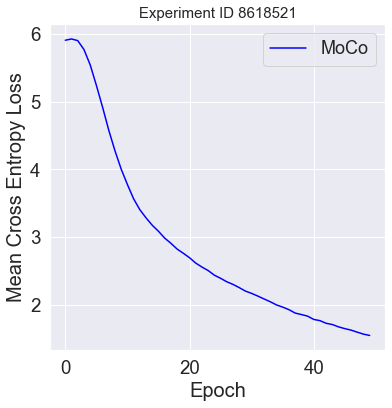

In [7]:
check_MoCo_loss('8618521')

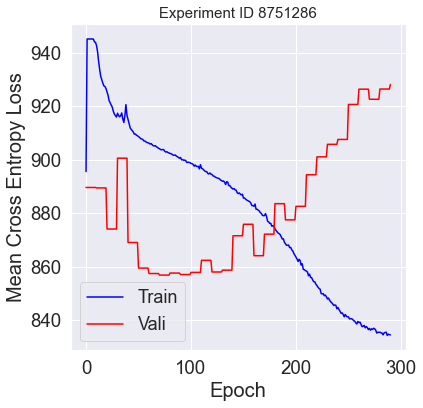

In [8]:
check_MoCo_loss('8751286')

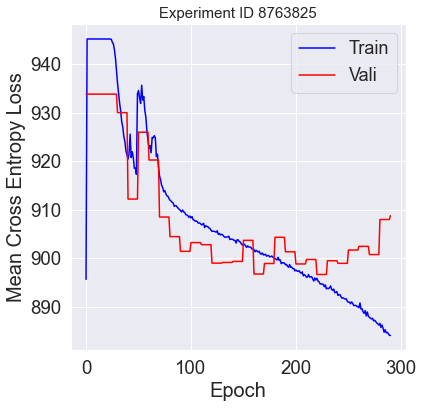

In [4]:
# no gaussian, no jitter
check_MoCo_loss('8763825')

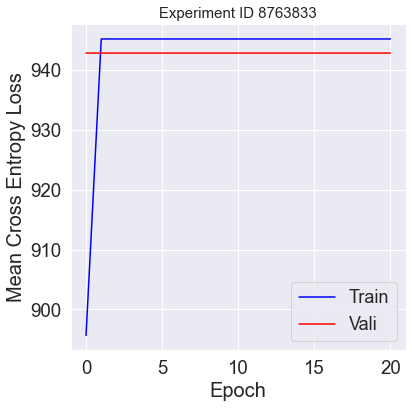

In [6]:
# no gaussian, no greyscale
check_MoCo_loss('8763833')

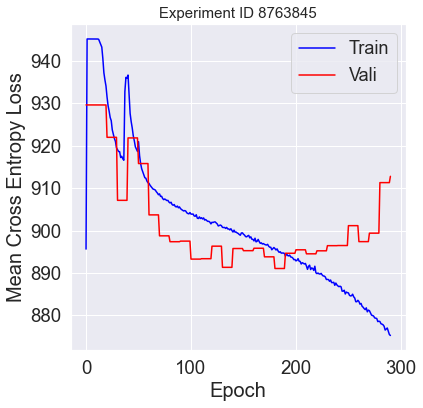

In [8]:
# no greyscale, no jitter
check_MoCo_loss('8763845')

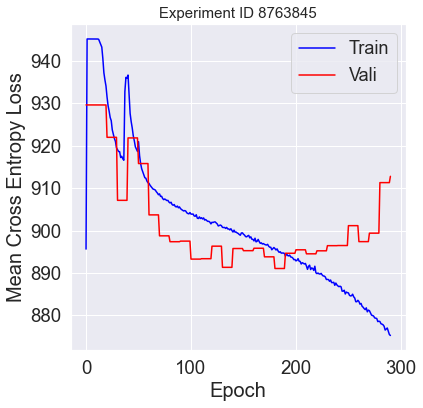

In [7]:
# no gaussian, no greyscale, no jitter
check_MoCo_loss('8763845')